## Logistic Regression

* To deomonstrate Logistic Regression, we will use the iris dataset.
  - This dataset contains the sepal and petal length and width of 150 iris flowers of three different species
    - Iris-Setosa
    - Iris-Versicolor
    - Iris-Virginica

In [15]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [16]:
X = iris['data'][:,3:] ## Every row and every third column

In [18]:
y = (iris['target'] == 2).astype(np.int) ## 1 if Iris-Virginica, else 0

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

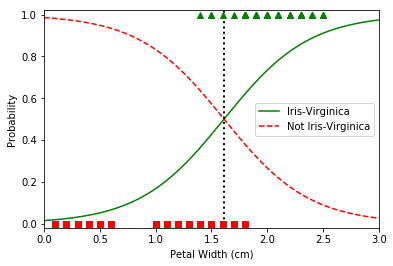

In [74]:
## y_proba[:,1] grabs the second column for each row, which is the probability of being Iris-Virginica
## y_proba[:,0] grabs the first column for each row, which is the probability of being not Iris-Virginica
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"r--",label="Not Iris-Virginica")
plt.legend(loc='best')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')

decision_boundary = X_new[y_proba[:,1] >= 0.5][0]
plt.plot([decision_boundary,decision_boundary], [-1,2],'k:', linewidth=2)
plt.axis([0, 3, -0.02, 1.02])
plt.plot(X[y==0],y[y==0],'rs') ## Use of boolean arrary indexind for numpy arrays
plt.plot(X[y==1],y[y==1],'g^') ## Use of boolean arrary indexind for numpy arrays
plt.show()

* Note: We can see that the decision boundary lies at about 1.6 (cm). This means that anything below 1.6 cm in petal length will be classified as Not Iris-Virginica, and anything above will be classified as Iris-Virginica

In [77]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

* Note: Logisitic Regression can be regularized using l1 or l2 penalties.
  - instead of alpha, scitkit-learn uses C which is alphas invers (Larger C => less regularization )